In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_csv('jamb_exam_results.csv', sep=',')

In [82]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

**Preparing the dataset**

In [83]:
df = df.drop(columns=["student_id"])
y = df["jamb_score"]

In [84]:
df = df.fillna(0)

In [85]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,0,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [86]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=len(df_test), random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [87]:
len(df_train), len(df_val), len(df_test)

(3000, 1000, 1000)

In [88]:
y_train = df_train.jamb_score.values
y_train_full = df_train_full.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values


del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [89]:
y_train

array([145, 231, 161, ..., 216, 234, 103])

In [90]:
from sklearn.feature_extraction import DictVectorizer

# numerical= X.select_dtypes(include=[np.number])
# categorical = X.select_dtypes(include=[object])

# X_num_names = list(numerical.columns)
# X_cat_names = list(categorical.columns)

train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [131]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')

X_val = dv.transform(val_dict)
y_pred = dt.predict(X_val)

mapped_dict = {i: (val, pred) for i, (val, pred) in enumerate(zip(y_val, y_pred))}


In [93]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

import numpy as np

# Zakładając, że dt jest wytrenowanym modelem DecisionTreeRegressor
# i dv jest instancją DictVectorizer

# Uzyskaj znaczenie cech
feature_importances = dt.feature_importances_

# Znajdź indeks cechy z najwyższą wartością znaczenia
most_important_index = np.argmax(feature_importances)

# Uzyskaj nazwę najważniejszej cechy
feature_names = dv.get_feature_names_out()
most_important_feature = feature_names[most_important_index]

# Wyświetl najważniejszą cechę
print(f'Most important feature: {most_important_feature}')

# val_dicts = df_val.fillna(0).to_dict(orient='records')
# X_val = dv.transform(val_dicts)

# y_pred = dt.predict(X_val)
# mse = mean_squared_error(y_val, y_pred)

# print(f'Mean Squared Error: {mse}')
# roc_auc_score(y_val, y_pred, multi_class='ovr')



|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]

Most important feature: study_hours_per_week


**Q. 2**

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
n_estimators=10
random_state=1
n_jobs=-1

In [96]:
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=n_jobs) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = mean_squared_error(y_pred, y_val, squared=False)

print("%.2f" % rmse)

42.14


/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Q. 3**

In [133]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    rmse = mean_squared_error(y_pred, y_val, squared=False)

    scores.append((n, rmse))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

In [20]:
df_scores

,n_estimators,rmse
0,10,42.137242
1,20,41.461215
2,30,41.106171
3,40,40.917194
4,50,40.852279
5,60,40.784281
6,70,40.677098
7,80,40.539333
8,90,40.504346
9,100,40.516805


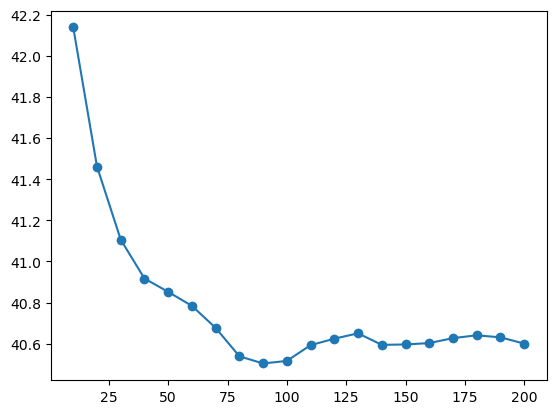

In [22]:
plt.plot(df_scores.n_estimators, df_scores.rmse, marker='o')

In [25]:
!pip install tqdm

**Q. 4**

In [28]:
from tqdm import tqdm

In [30]:
max_depth = [10, 15, 20, 25]
scores = []
for d in tqdm(max_depth):
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)

        rmse = mean_squared_error(y_pred, y_val, squared=False)

        scores.append((n, d, rmse))
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'rmse'])



  0%|          | 0/4 [00:00<?, ?it/s]/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared

In [53]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                                          \
max_depth        10      20      30      40      50      60      70      80    
n_estimators                                                                   
10            41.258  40.881  40.625  40.270  40.317  40.277  40.285  40.210   
15            42.004  41.456  41.168  40.931  40.783  40.724  40.689  40.534   
20            42.025  41.389  41.116  40.847  40.809  40.784  40.654  40.515   
25            42.160  41.471  41.125  40.934  40.867  40.797  40.687  40.548   

                                                                              \
max_depth        90      100     110     120     130     140     150     160   
n_estimators                                                                   
10            40.174  40.250  40.286  40.315  40.329  40.300  40.314  40.354   
15            40.497  40.505  40.531  40.580  40.558  40.520  40.529  40.523   
20            40.493  40.518  40.573  40.590  40.589  40.536  40.537  40.550   
25            40.513  40.522  40.592  40.620  40.646  40.591  40.593  40.600   

                                              
max_depth        170     180     190     200  
n_estimators                                  
10            40.360  40.364  40.354  40.325  
15            40.534  40.547  40.550  40.544  
20            40.564  40.575  40.582  40.548  
25            40.624  40.639  40.629  40.599

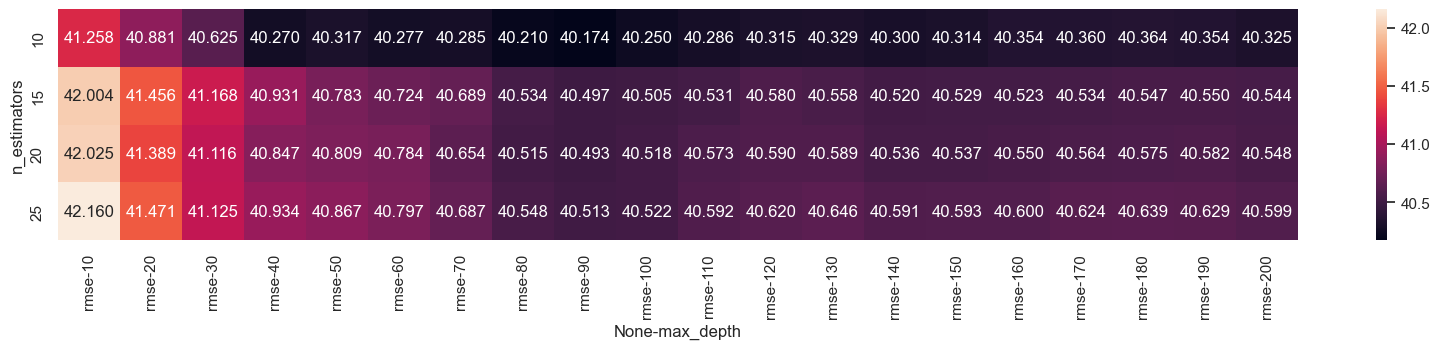

In [54]:
# Zakładając, że df_scores_pivot jest już zdefiniowane
plt.figure(figsize=(20, 3))
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")
plt.show()



**Q. 5**

In [58]:
n_estimators=10
max_depth=20
random_state=1
n_jobs=-1

rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state, n_jobs=n_jobs)
rf.fit(X_train, y_train)
# y_pred = rf.predict(X_val)


RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [65]:

feature_importances = rf.feature_importances_

# Znajdź indeks cechy z najwyższą wartością znaczenia
most_important_index = np.argmax(feature_importances)

# Uzyskaj nazwę najważniejszej cechy
feature_names = dv.get_feature_names_out()
most_important_feature = feature_names[most_important_index]

# # Wyświetl najważniejszą cechę
print(f'Most important feature: {most_important_feature}')

Most important feature: study_hours_per_week


**Q. 6** XGBoost

In [66]:
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00:--:--


In [67]:
import xgboost as xgb

In [115]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.get_feature_names_out().tolist())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.get_feature_names_out().tolist())

In [116]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [117]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [107]:
model = xgb .train(xgb_params, dtrain, evals=watchlist, num_boost_round=100)

[0]	train-rmse:42.69552	val-rmse:44.86028
[1]	train-rmse:39.85005	val-rmse:43.06070
[2]	train-rmse:37.95285	val-rmse:41.83772
[3]	train-rmse:36.52203	val-rmse:41.26987
[4]	train-rmse:35.36066	val-rmse:41.02965
[5]	train-rmse:34.43646	val-rmse:40.87186
[6]	train-rmse:33.71528	val-rmse:40.69132
[7]	train-rmse:33.07449	val-rmse:40.65074
[8]	train-rmse:32.41772	val-rmse:40.72710
[9]	train-rmse:31.91000	val-rmse:40.82972
[10]	train-rmse:31.55119	val-rmse:40.83684
[11]	train-rmse:30.99534	val-rmse:40.98243
[12]	train-rmse:30.33163	val-rmse:41.05515
[13]	train-rmse:30.04347	val-rmse:41.18635
[14]	train-rmse:29.44279	val-rmse:41.32160
[15]	train-rmse:29.08791	val-rmse:41.37832
[16]	train-rmse:28.84106	val-rmse:41.45737
[17]	train-rmse:28.28883	val-rmse:41.51113
[18]	train-rmse:27.90071	val-rmse:41.55139
[19]	train-rmse:27.60694	val-rmse:41.66496
[20]	train-rmse:27.24424	val-rmse:41.80313
[21]	train-rmse:26.79013	val-rmse:41.88767
[22]	train-rmse:26.64232	val-rmse:41.90488
[23]	train-rmse:26.31

In [108]:
y_pred = model.predict(dtrain)

In [118]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [125]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [126]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [127]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [128]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

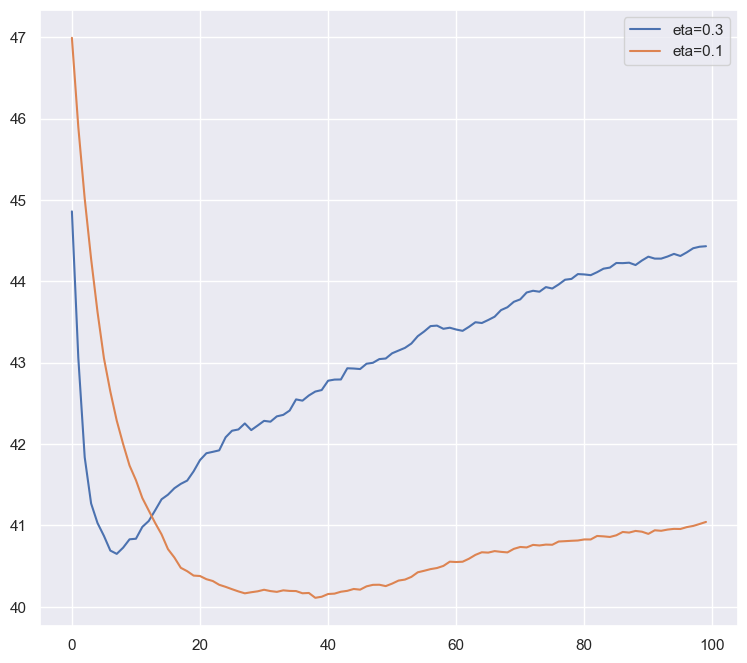

In [129]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()

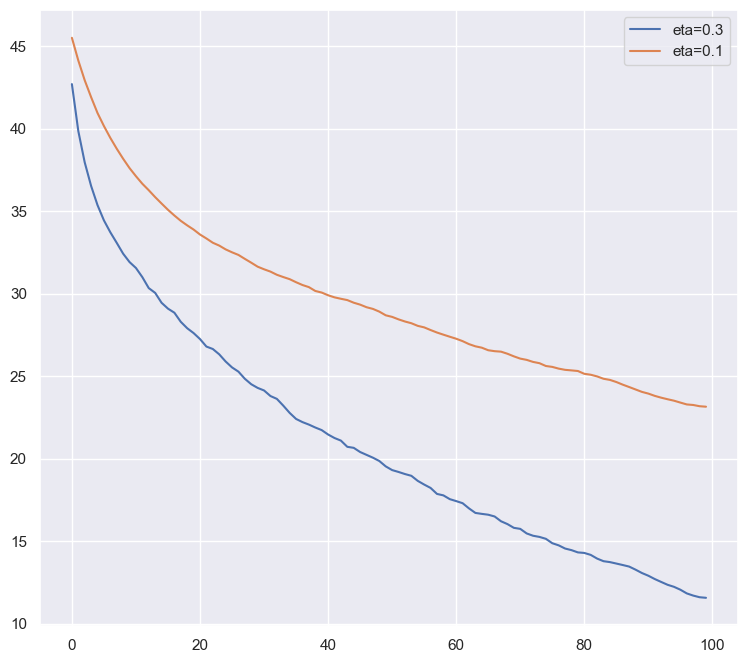

In [130]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.train_rmse, label=eta)

plt.legend()